# Introduction to NMR processing

### Library Imports

In [1]:
from spectrochempy.api import *
import os


        SpectroChemPy's API
        Version   : 0.1a3.post11
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


### Import data

Here we import two dataset, one is 1D and the other is 2D

Because , we will sometimes need to recall the original dataset, we create to getting functions

In [2]:
# 1D dataset getting function 
def get_source1D():
    source1D = NDDataset()
    path = os.path.join(scpdata, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')
    source1D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return source1D

# 2D dataset getting function
def get_source2D():
    source2D = NDDataset()
    path = os.path.join(scpdata, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')
    source2D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return source2D

In [3]:
source1D = get_source1D()
source1D # display info

NDDataset: [-1037.267, -1077.841, ...,   -0.053,    0.101] unitless

In [4]:
source2D = get_source2D()
source2D

NDDataset: [[   0.062,    0.224, ...,    0.031,   -0.033],
            [  -0.003,    0.162, ...,   -0.081,    0.011],
            ..., 
            [   0.000,   -0.000, ...,    0.000,   -0.000],
            [   0.000,   -0.000, ...,    0.000,   -0.000]] unitless

### Plot the 1D dataset raw data

<IPython.core.display.Javascript object>


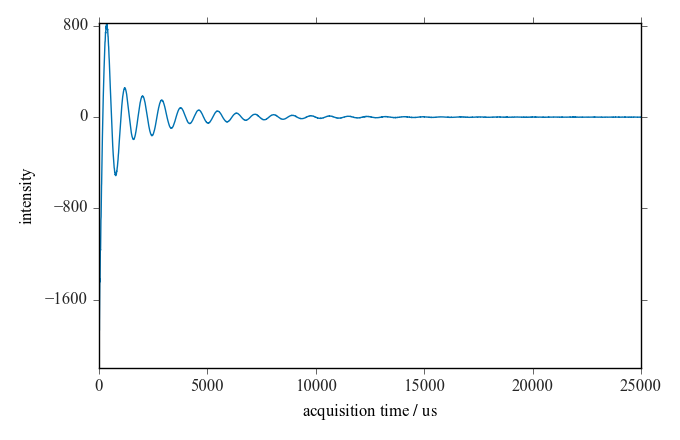

<IPython.core.display.Javascript object>


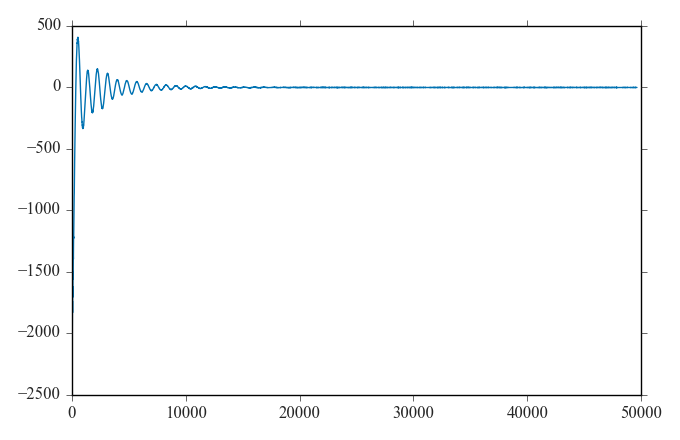

In [5]:
# plot the real data
source1D.plot(xlim=(0,25000)) 
    # `hold=True` to make that the following plot commands will be on the same graph

# plot the imaginary data on the same plot
source1D.plot(imag=True, data_only=True)
    # `data_only=True` to plot only the additional data, without updating the figure setting 
    # such as xlim and so on.

To display the imaginary part, one can also simply use the show_complex commands.

<IPython.core.display.Javascript object>


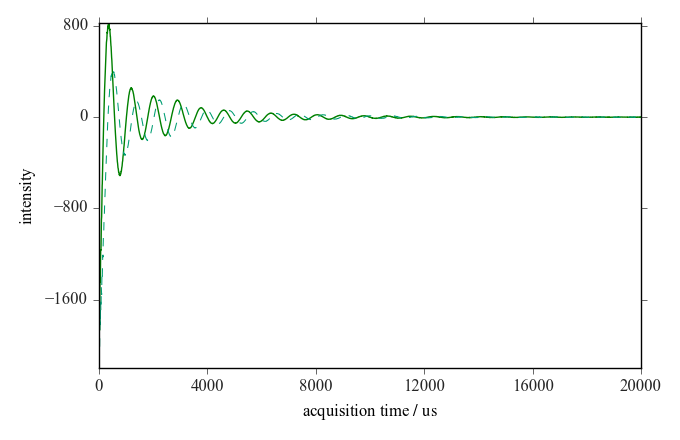

In [6]:
source1D.plot(show_complex=True, color='green',
                xlim=(0.,20000.))

### Plot the 2D dataset raw data

<IPython.core.display.Javascript object>


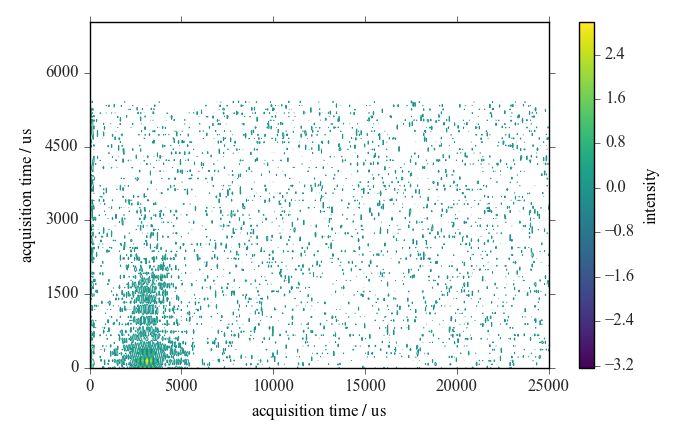

In [7]:
source2D = get_source2D()
source2D.plot(xlim=(0.,25000.))

probably less util, but multiple display is also possible

<IPython.core.display.Javascript object>


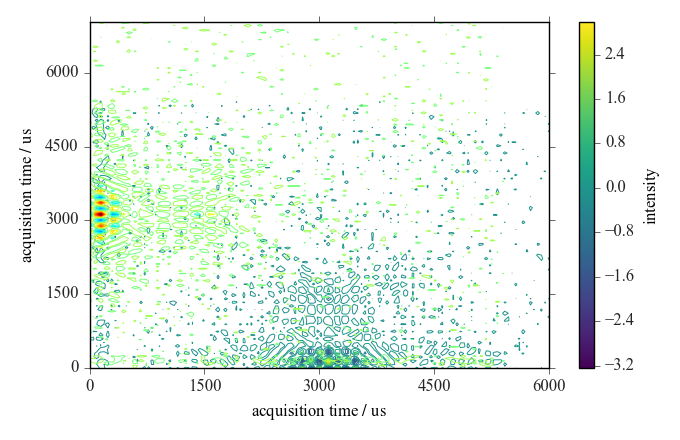

In [8]:
source2D.plot(xlim=(0.,6000.))
source2D.T.plot(cmap='jet', xlim=(0.,6000.), data_only=True, hold=True)

## Apodization

<IPython.core.display.Javascript object>


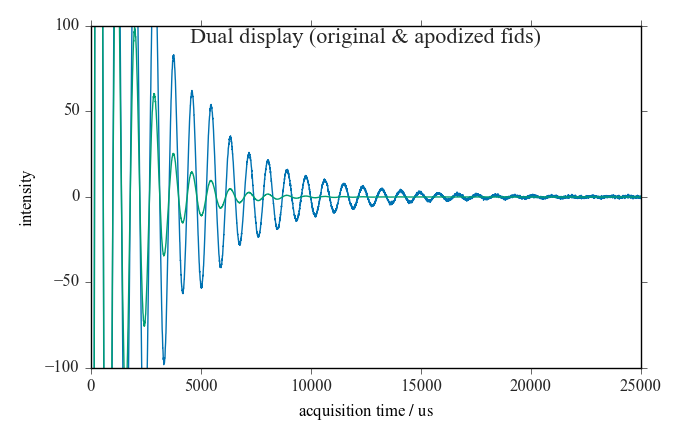

In [9]:
# Plot
source1D = get_source1D() # restore original
source1D.plot() 

# create the apodized dataset
lb_source = source1D.em(lb=100.*ur.Hz)

lb_source.plot(xlim=(0,25000), zlim=(-100,100), hold=True)

t = source1D.ax.text(12500,90,'Dual display (original & apodized fids)', ha='center', fontsize=16)

Note that the apodized dataset actually replace the original data

In [10]:
# check that both dataset are the same
lb_source is source1D  # note here, that the original data are modified by default 
                       # when applying apodization function. 
                       # Use the `inplace` keyword to modify this behavior

True

If we want to avoid this behavior and create a new dataset instead, we use the `inplace` flag.

In [11]:
source1D = get_source1D()

lb2_source = source1D.em(lb=100.*ur.Hz, inplace=False)

# check that both dataset are different
lb2_source is not source1D

True

We can also get only the apodization function

<IPython.core.display.Javascript object>


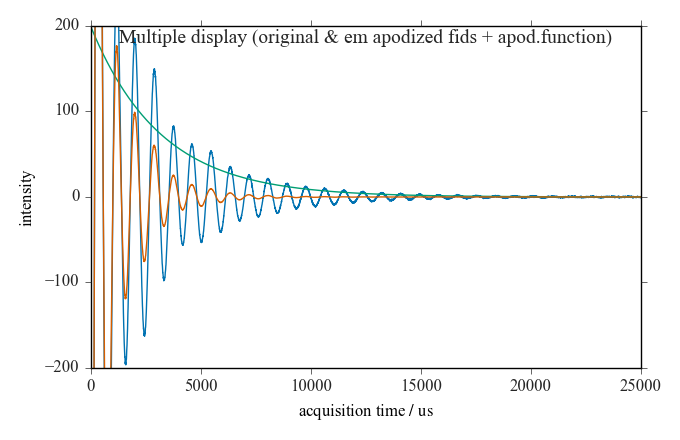

In [12]:
# Plot
source1D = get_source1D() # restore original
source1D.plot() 

# create the apodized dataset (if apply is False, the apodization function is not applied to the dataset, 
# but returned)
apodfunc = source1D.em(lb=100.*ur.Hz, apply=False)*200

apodfunc.plot(xlim=(0,25000), zlim=(-200,200), hold=True)

source1D.em(lb=100.*ur.Hz, apply=True)
source1D.plot(data_only=True, hold=True) 

t = source1D.ax.text(12500,180,'Multiple display (original & em apodized fids + apod.function)', ha='center', fontsize=14)

Apodization function can be em, gm, sp ...

<IPython.core.display.Javascript object>


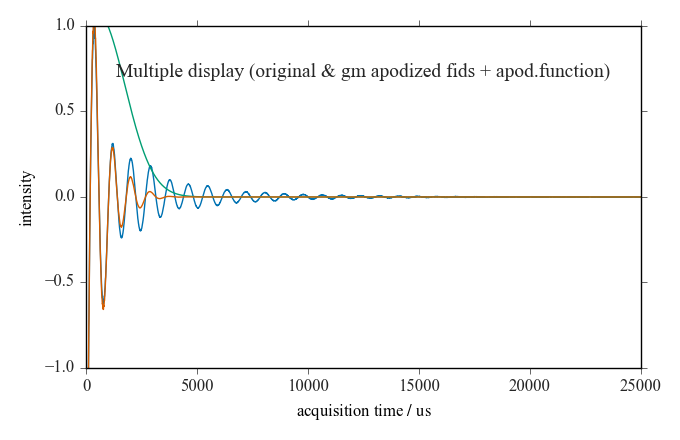

In [13]:
# Plot
source1D = get_source1D() # restore original
# normalize ampliture
source1D /= source1D.data.max()

source1D.plot() 

LB = 100.*ur.Hz
GB = 300.*ur.Hz
apodfunc = source1D.gm(gb=GB, lb=LB, apply=False)

apodfunc.plot(hold=True)

source1D.gm(gb=GB, lb=LB) #  apply=True by default

source1D.plot(xlim=(0,25000), zlim=(-1,1), hold=True) 

t = source1D.ax.text(12500,.70,'Multiple display (original & gm apodized fids + apod.function)', ha='center', fontsize=14)

**TODO**: sp function

#### Apodization of 2D data

<IPython.core.display.Javascript object>


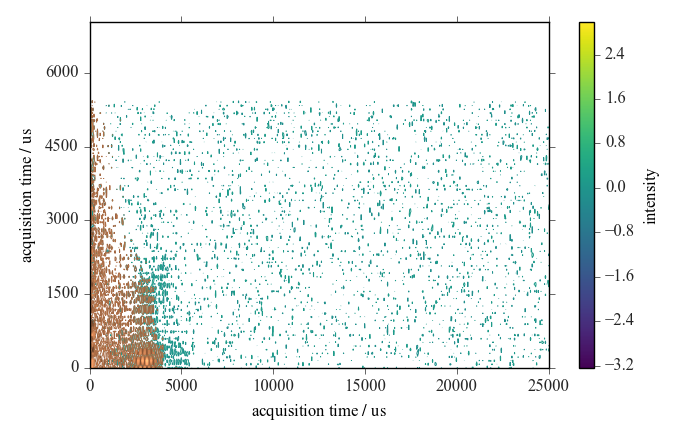

In [14]:
source2D = get_source2D()
source2D.plot(xlim=(0.,25000.))

LB = 200.*ur.Hz
source2D.em(lb=LB)
source2D.em(lb=LB/2, axis=0)  
source2D.plot(data_only=True, cmap='copper', hold=True)

### Time-frequency trasforms : FFT

In [15]:
source1D = get_source1D() # restore original
LB = 10.*ur.Hz
source1D.em(lb=LB)
#source1D.zf_auto(inplace=True)
#transf1 = source1D.fft() # by defauut fft create a new dataset

NDDataset: [-1037.267, -1077.841, ...,   -0.011,    0.021] unitless

In [16]:
source1D = get_source1D() # restore original
LB = 10.*ur.Hz
GB = 50.*ur.Hz
source1D.gm(gb=GB, lb=LB)
#source1D.zf_auto()
#transf2 = source1D.fft()

NDDataset: [-1037.267, -1077.841, ...,   -0.000,    0.000] unitless

As the new dataset is transformed, function that apply to time data such as **em** should not work

In [17]:
#_ = transf1.em(lb=10*ur.Hz)